In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Data Identification
diabetes = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


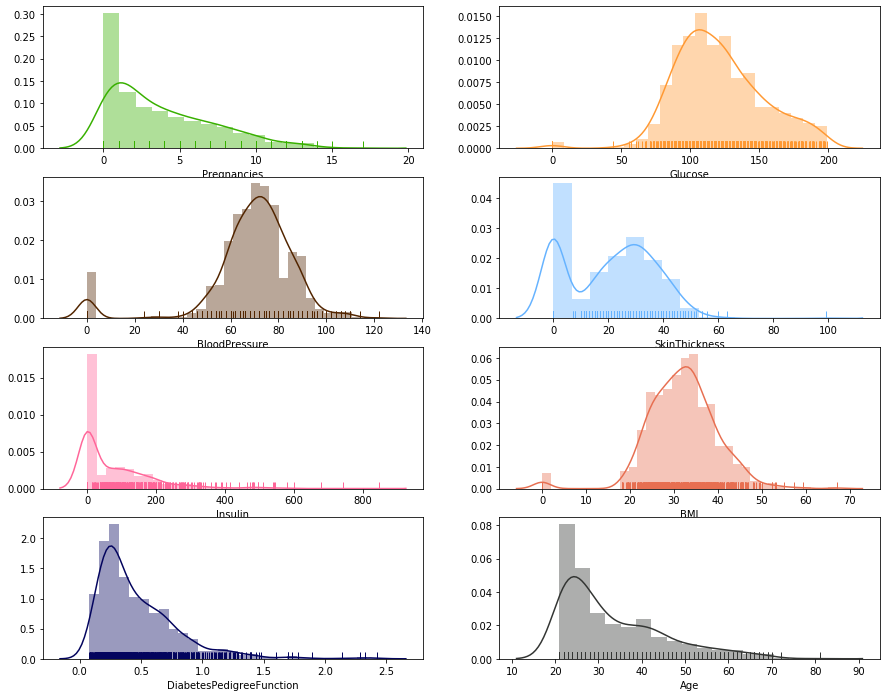

In [6]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(diabetes['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(diabetes['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(diabetes['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(diabetes['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(diabetes['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(diabetes['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(diabetes['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(diabetes['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

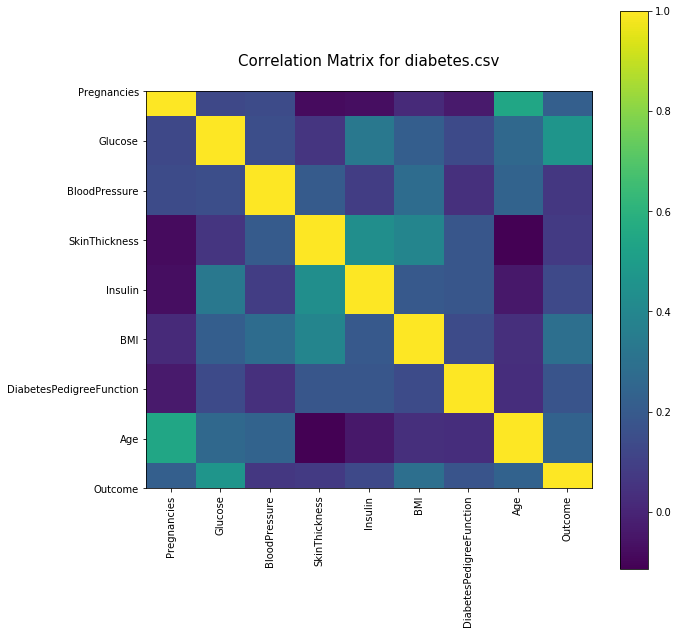

In [7]:
diabetes.dataframeName = 'diabetes.csv'
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
plotCorrelationMatrix(diabetes, 10)

In [8]:
# Data Filtering
Y = diabetes.Outcome
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
# Data Filtering
X = diabetes.drop(['Outcome'], axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
# Data Validation and Cleansing
X[['Glucose','BloodPressure','SkinThickness','BMI','Age']].isnull().values.any()

False

In [11]:
# Data Analysis
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

In [13]:
X_train.shape, Y_train.shape

((614, 8), (614,))

In [14]:
X_test.shape, Y_test.shape

((154, 8), (154,))

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [16]:
# Prediction methods
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [17]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE):', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error (MAE):', mean_absolute_error(Y_test, Y_pred))
print('R Square Error:', r2_score(Y_test,Y_pred))

Coefficients: [ 0.02208226  0.00571484 -0.00184544 -0.00028493 -0.00021057  0.01221145
  0.18481516  0.00264161]
Intercept: -0.851375916282515
Mean squared error (MSE): 0.14971844787458788
Mean absolute error (MAE): 0.32055955277239556
R Square Error: 0.35780019717964806


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

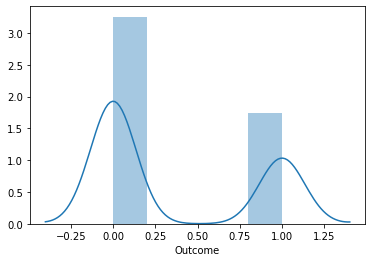

In [19]:
sns.distplot(Y)
plt.show()

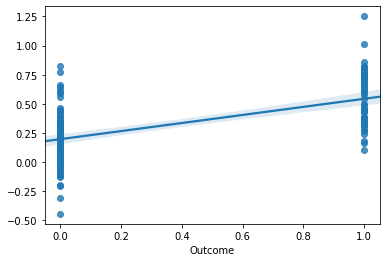

In [20]:
sns.regplot(Y_test,Y_pred)
plt.show()